<a href="https://colab.research.google.com/github/Jigar098/DataScience/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Prediction.csv to Loan_Prediction.csv


In [6]:
df=pd.read_csv('Loan_Prediction.csv',na_values=['?'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d58ae4320>,
      dtype=object)

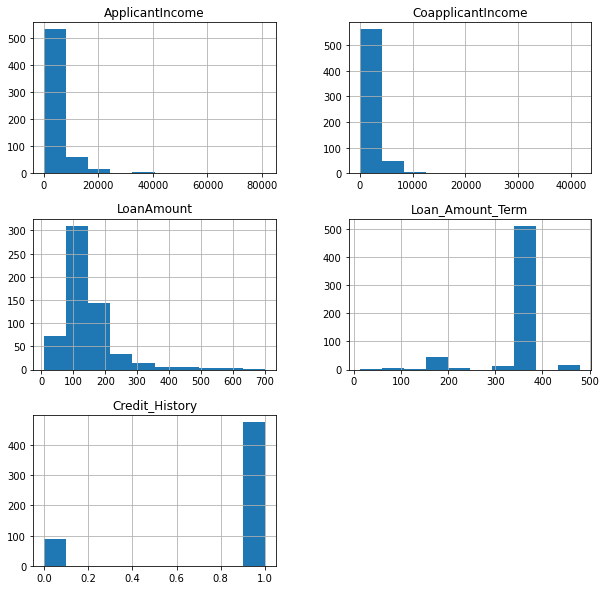

In [ ]:
df.hist(figsize=[10,10])

In [ ]:
df['Loan_Status'] = np.where((df['Loan_Status'] == 'Y'), 1, 0)

In [ ]:
df['Married'] = np.where((df['Married'] == 'Yes'), 1, 0)
df['Gender'] = np.where((df['Gender'] == 'Female'), 1, 0)
df['Education'] = np.where((df['Education'] == 'Graduate'), 1, 0)
df['Self_Employed'] = np.where((df['Self_Employed'] == 'Yes'), 1, 0)
df['Dependents'] = np.where((df['Dependents'] == '0'), 0, 1) 

In [7]:
df.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
def f(row):
  if row['Property_Area'] == "Rural":
    val = 1
  elif row['Property_Area'] == "Urban":
    val = 0
  else:
    val = 2
  return val

df['Property_Area'] = df.apply(f, axis=1)

In [ ]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df.isnull().sum().sort_values(ascending = False)

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(1)
df.isnull().sum().sort_values(ascending = False)

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df.isnull().sum().sort_values(ascending = False)

In [ ]:
df.dropna(inplace = True)
df.shape

(600, 12)

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
x= df[['Credit_History','CoapplicantIncome','Married','Property_Area']]
y = df['Loan_Status']
X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(480, 12)
(480,)
(120, 12)
(120,)


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
accuracy_score(Y_test,knn.predict(X_test))

0.625

In [ ]:
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(X_train[['Credit_History','CoapplicantIncome','Married','Property_Area']])
X_test_minmax=min_max.fit_transform(X_test[['Credit_History','CoapplicantIncome','Married','Property_Area']])

In [ ]:
del knn
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
accuracy_score(Y_test,knn.predict(X_test_minmax))

0.8083333333333333

In [ ]:
X_train_scale = scale(X_train[['Credit_History','CoapplicantIncome','Married','Property_Area']])
X_test_scale = scale(X_test[['Credit_History','CoapplicantIncome','Married','Property_Area']])

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(X_train_scale,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy_score(Y_test,log.predict(X_test_scale))

0.8

In [ ]:
enc=OneHotEncoder(sparse=False)

In [ ]:
len(df['Loan_Status'].unique())


2

In [ ]:
X_train_1=X_train
X_test_1=X_test
columns=['Credit_History','CoapplicantIncome','Married','Property_Area']

In [ ]:
for col in columns:
    data=X_train[[col]].append(X_test[[col]])
    enc.fit(data)
    # Fitting One Hot Encoding on train data
    temp = enc.transform(X_train[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
    # In side by side concatenation index values should be same
    # Setting the index values similar to the X_train data frame
    temp=temp.set_index(X_train.index.values)
    # adding the new One Hot Encoded varibales to the train data frame
    X_train_1=pd.concat([X_train_1,temp],axis=1)
    # fitting One Hot Encoding on test data
    temp = enc.transform(X_test[[col]])
    # changing it into data frame and adding column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
    # Setting the index for proper concatenation
    temp=temp.set_index(X_test.index.values)
    # adding the new One Hot Encoded varibales to test data frame
    X_test_1=pd.concat([X_test_1,temp],axis=1)
X_train_1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       ...
       'CoapplicantIncome_1929.0', 'CoapplicantIncome_1447.0',
       'CoapplicantIncome_3263.0', 'CoapplicantIncome_1213.0',
       'CoapplicantIncome_1508.0', 'Married_1', 'Married_0', 'Property_Area_2',
       'Property_Area_0', 'Property_Area_1'],
      dtype='object', length=299)

In [ ]:
X_train_scale=scale(X_train_1)
X_test_scale=scale(X_test_1)
log.fit(X_train_scale,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy_score(Y_test,log.predict(X_test_scale))

1.0